In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pwd

/c/data/jasmin/jasminblog/content/downloads/notebooks


# Data Analysis With Python I - Importing Data

<!-- PELICAN_BEGIN_SUMMARY -->
Goal: Use Python to load data into a dataframe and get basic statistics.
<!-- PELICAN_END_SUMMARY -->

Specifically, I plan to use Python to:
    - Import an Excel dataset with 1k rows and 132 columns into a dataframe,
    - Get preliminary dataframe statistics: sum, mean, min/max 
    - Visualize the dataframe as a time series graph
The 2 sample data files I will use are:
    - "2015 USA Census Data" from gov.org (data/analysis1/sample.xlsx)
    - "Historical daily price data for 9 stocks from 2010-2011" (data/analysis1/Stock_px.xlsx)    

**First Example - 2015 USA Census Data in Excel**<br>- Python Pandas to Read Excel Files

In [2]:
## Import pandas to read Excel, head(3) to show the first 3 rows only, shape to show how many rows/columns
df = pd.read_excel('data/analysis1/sample.xlsx')
df.head(3)
df.shape

,STATEFIPS,STATE,zipcode,agi_stub,income1,income2,income3,income4,income5,income6,...,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,total
0,1,New Hampshere,0,1,836320,481570,109790,233260,455560,1356760,...,328469,0,0,0,0,61920,48150,732670,1933120,1427680
1,1,New Yok,0,2,494830,206630,146250,129390,275920,1010990,...,965011,0,0,0,0,73720,107304,415410,1187403,847710
2,1,Floria,0,3,261250,80720,139280,36130,155100,583910,...,1333418,0,0,0,0,64200,139598,193030,536699,481250


(101, 132)

<br>
**Two Commands in Python Pandas to Read Excel Files**
    - pd = pd.read_excel("data/sample.xlsx") or
    - pd = pd.ExcelFile("data/sample.xlsx")
    - Both commands can read Excel file
    - Use Pandas Timeit to time how long does it take to run the reports
    - In general, the ExcelFile command will be faster

In [5]:
def test_excelfile():
    df = pd.ExcelFile("data/analysis1/sample.xlsx")  # this code is faster...use panda timeit library to compare 
    
def test_read_excel():
    df = pd.read_excel("data/analysis1/sample.xlsx")

print("pd.ExcelFile: time=")
%timeit test_excelfile()
    
print("pd.read_excel: time=")
%timeit test_read_excel()


pd.ExcelFile: time=
67.2 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
pd.read_excel: time=
86.5 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<br>
**How to filter data in Python instead of in Excel?**
    - The following example filters and count ("shape") the dataframe for zipcode 35005
    - This approach can easily scale to more complicated datasets, and provides results using Python pandas dataframe

In [7]:
df_filtered=df[df["zipcode"]==35005]

df_filtered.head(3)
df_filtered.shape

,STATEFIPS,STATE,zipcode,agi_stub,income1,income2,income3,income4,income5,income6,...,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,total
12,1,VERMONT,35005,1,1350,750,190,390,730,2300,...,545,0,0,0,0,100,74,1200,3243,2290
13,1,New Hampshere,35005,2,980,370,230,350,530,1970,...,1679,0,0,0,0,100,116,880,2501,1580
14,1,New Yok,35005,3,490,150,210,120,290,1070,...,2373,0,0,0,0,100,226,390,1136,850


(6, 132)

<br>
**Second Example - 9 stocks historical price from 2010-2011**<br>- Import pandas and read the Excel file (specified the directory)      

In [8]:
df_stock = pd.read_excel('data/analysis1/Stock_px.xlsx')
df_stock.head(3)
df_stock.shape

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker
0,2010-01-04,16.40,214.01,14.66,128.32,60.84,29.76,58.10,1132.99,66.16,XYZ Inc.
1,2010-01-05,15.89,214.38,14.74,126.77,60.14,29.77,58.80,1136.52,66.42,Fidelity
2,2010-01-06,16.72,210.97,14.66,125.94,60.63,29.58,58.21,1137.14,66.99,TD Bank


(451, 11)

<br>
**Insert a new column that is the sum of 3 existing columns**

In [9]:
## Show the last 3 rows of data
df_stock["total"] = df_stock["AA"] + df_stock["AAPL"] + df_stock["GE"]
df_stock.tail(3)

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker,total
448,2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16,XYZ Inc.,428.64
449,2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37,Fidelity,434.75
450,2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11,TD Bank,448.86


In [7]:
## Now get the sum / mean / min / max for stock AA
df_stock["AA"].sum(), df_stock["AA"].mean(),df_stock["AA"].min(),df_stock["AA"].max()

(95433.239999999991, 17.44028508771932, 4.2000000000000002, 43.619999999999997)

<br>
**Pandas Time Series Analysis: DatetimeIndex and Resample**
    - Change column DATE type from string to timeseries (see Pandas TimeSeries blog)
    - Set column "DATE" as index

In [10]:
## Check the data type
type(df_stock.DATE[0])

## the type is a timestamp

pandas._libs.tslib.Timestamp

In [11]:
## Reload the dataframe with the index specified as the date 
df_stock_index = pd.read_excel('data/analysis1/Stock_px.xlsx', parse_dates=["DATE"], index_col="DATE")
df_stock_index.head(3)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker
DATE,,,,,,,,,,
2010-01-04,16.40,214.01,14.66,128.32,60.84,29.76,58.10,1132.99,66.16,XYZ Inc.
2010-01-05,15.89,214.38,14.74,126.77,60.14,29.77,58.80,1136.52,66.42,Fidelity
2010-01-06,16.72,210.97,14.66,125.94,60.63,29.58,58.21,1137.14,66.99,TD Bank


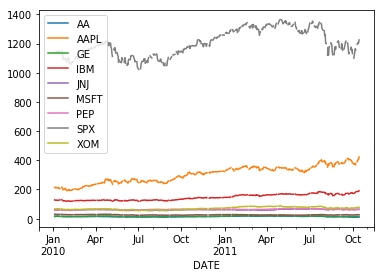

In [12]:
## Now we use the dataframe resample method to create a line graph with multiple series
df_stock_index.resample('D').sum().plot()